In [2]:
!pip install keras

You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [15]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [16]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
#features
X = dataset.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)
#labels
Y = dataset['Exited']

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.3+ KB


In [19]:
X['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [20]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X['Gender'] = labelencoder_X_1.fit_transform(X['Gender'])

In [21]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [22]:
X = pd.concat([X,pd.get_dummies(X['Geography'],prefix=('Georaphy'))],axis=1)


In [23]:
X = X.drop('Geography',axis=1)

In [24]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Georaphy_France,Georaphy_Germany,Georaphy_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 12)
(8000,)
(2000, 12)
(2000,)


In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
# Part 2 - Now let's make the ANN!
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=12, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
8000/8000 [==============================] - 3s 330us/step - loss: 0.4878 - acc: 0.7956
Epoch 2/100
8000/8000 [==============================] - 2s 265us/step - loss: 0.4277 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 2s 221us/step - loss: 0.4222 - acc: 0.8095
Epoch 4/100
8000/8000 [==============================] - 2s 231us/step - loss: 0.4171 - acc: 0.8252
Epoch 5/100
8000/8000 [==============================] - 2s 273us/step - loss: 0.4125 - acc: 0.8316
Epoch 6/100
8000/8000 [==============================] - 2s 254us/step - loss: 0.4093 - acc: 0.8317
Epoch 7/100
8000/8000 [==============================] - 2s 215us/step - loss: 0.4064 - acc: 0.8341
Epoch 8/100
8000/8000 [==============================] - 2s 271us/step - loss: 0.4041 - acc: 0.8351
Epoch 9/100
8000/8000 [==============================] - 2s 217us/step - loss: 0.4025 - acc: 0.8334
Epoch 10/100
8000/8000 [==============================] - 2s 228us/step - loss: 0.4012 - acc: 0.8370

8000/8000 [==============================] - 2s 239us/step - loss: 0.3516 - acc: 0.8576
Epoch 83/100
8000/8000 [==============================] - 2s 227us/step - loss: 0.3518 - acc: 0.8561
Epoch 84/100
8000/8000 [==============================] - 2s 264us/step - loss: 0.3519 - acc: 0.8594
Epoch 85/100
8000/8000 [==============================] - 2s 241us/step - loss: 0.3518 - acc: 0.8576
Epoch 86/100
8000/8000 [==============================] - 2s 223us/step - loss: 0.3512 - acc: 0.8585
Epoch 87/100
8000/8000 [==============================] - 2s 263us/step - loss: 0.3513 - acc: 0.8604
Epoch 88/100
8000/8000 [==============================] - 2s 217us/step - loss: 0.3510 - acc: 0.8579
Epoch 89/100
8000/8000 [==============================] - 2s 233us/step - loss: 0.3513 - acc: 0.8576
Epoch 90/100
8000/8000 [==============================] - 2s 267us/step - loss: 0.3509 - acc: 0.8582
Epoch 91/100
8000/8000 [==============================] - 2s 241us/step - loss: 0.3502 - acc: 0.8596
Epo

In [31]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred 

array([[ 0.24218398],
       [ 0.3364177 ],
       [ 0.1053662 ],
       ..., 
       [ 0.19964315],
       [ 0.15621217],
       [ 0.22836268]], dtype=float32)

In [42]:
pred = y_pred > 0.5

In [44]:
pred

array([[False],
       [False],
       [False],
       ..., 
       [False],
       [False],
       [False]], dtype=bool)

In [33]:
yhat = []
for i in y_pred:
    if i > 0.5:
        yhat.append(1)
    else:
        yhat.append(0)

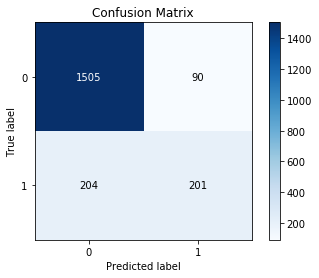

In [38]:
import scikitplot
%matplotlib inline
scikitplot.metrics.plot_confusion_matrix(y_test,yhat)


In [41]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
print('Confusion Matrix \n')
print(confusion_matrix(y_test, yhat))
print('Accuracy : ',accuracy_score(y_test,yhat))

Confusion Matrix 

[[1505   90]
 [ 204  201]]
Accuracy :  0.853
